In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [6]:
os.makedirs("charts", exist_ok=True)

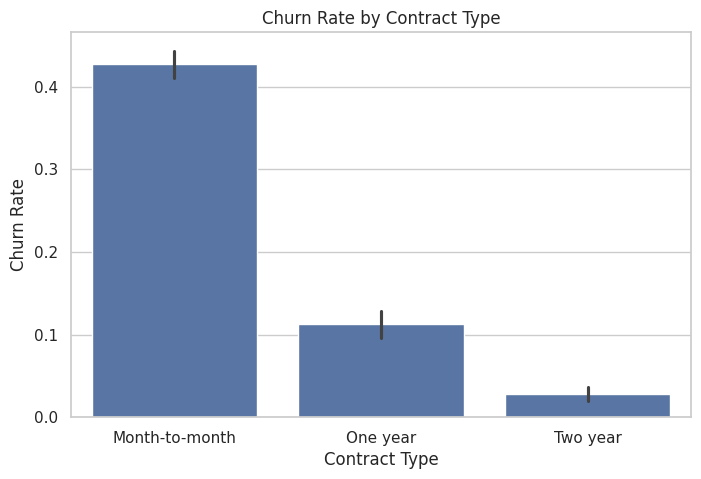

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Contract',
    y='Churn',
    data=df,
    estimator=np.mean
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.savefig("charts/churn_rate_by_contract.png", bbox_inches="tight")
plt.show()

In [8]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years']
)

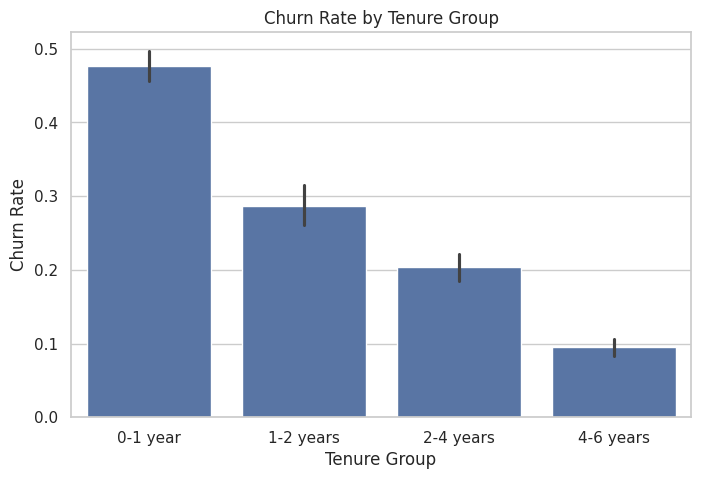

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='tenure_group',
    y='Churn',
    data=df,
    estimator=np.mean
)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.savefig("charts/churn_rate_by_tenure_group.png", bbox_inches="tight")
plt.show()

In [10]:
df['monthly_charge_group'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 35, 70, 120],
    labels=['Low', 'Medium', 'High']
)

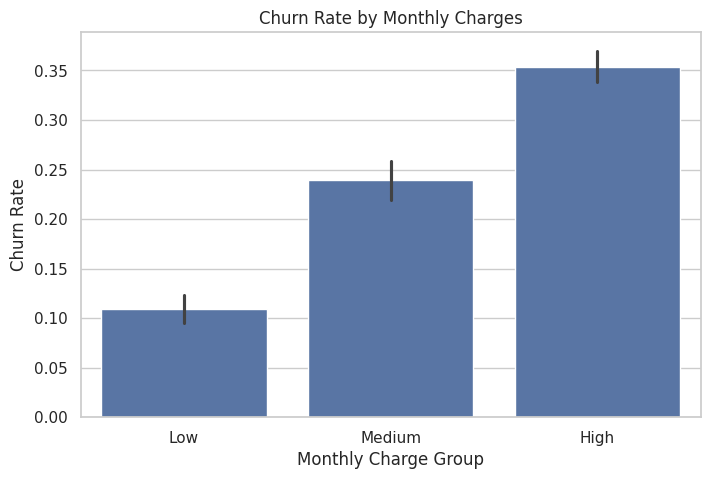

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='monthly_charge_group',
    y='Churn',
    data=df,
    estimator=np.mean
)
plt.title("Churn Rate by Monthly Charges")
plt.ylabel("Churn Rate")
plt.xlabel("Monthly Charge Group")
plt.savefig("charts/churn_rate_by_monthly_charges.png", bbox_inches="tight")
plt.show()

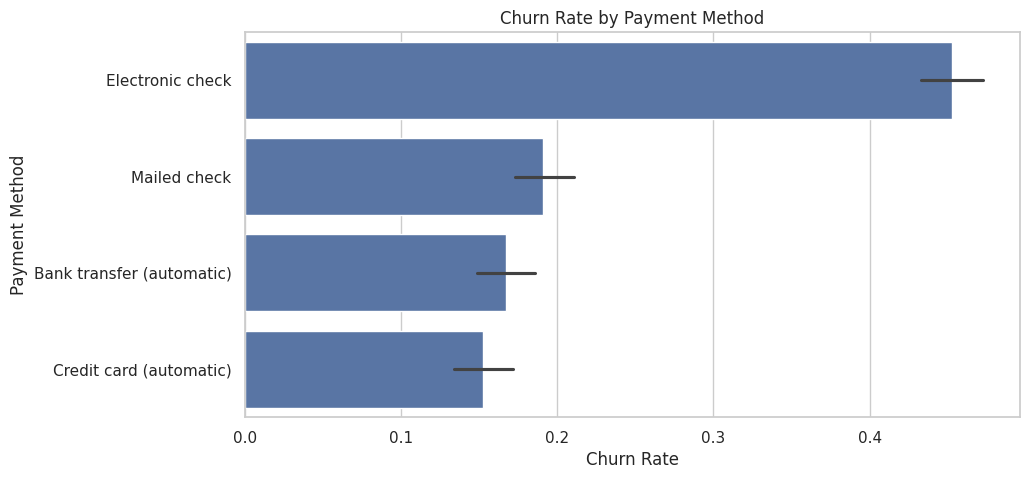

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(
    y='PaymentMethod',
    x='Churn',
    data=df,
    estimator=np.mean
)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate")
plt.ylabel("Payment Method")
plt.savefig("charts/churn_rate_by_payment_method.png", bbox_inches="tight")
plt.show()

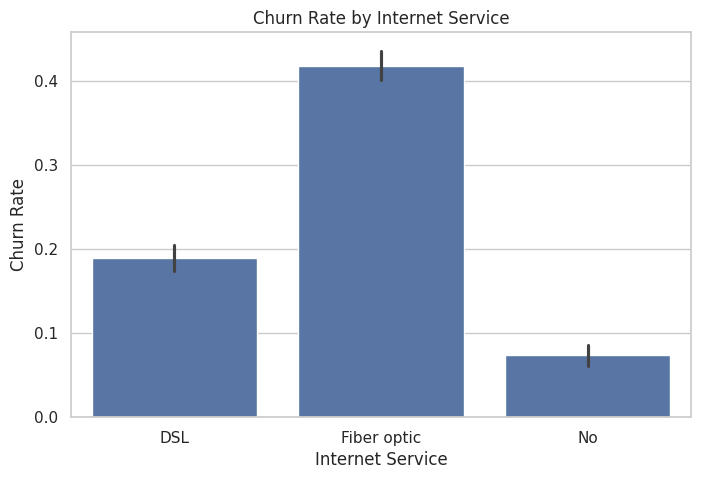

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='InternetService',
    y='Churn',
    data=df,
    estimator=np.mean
)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.xlabel("Internet Service")
plt.savefig("charts/churn_rate_by_internet_service.png", bbox_inches="tight")
plt.show()

In [14]:
from google.colab import files
files.download("charts")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>